# Twitter Analysis - Chessa

**Import Library**

In [1]:
import re
import string
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfTransformer

**Load Dataset**

In [2]:
raw_data = pd.read_csv("./data/tweet_tentang_lapor_dari_september2018.csv")

raw_data

id      conversation_id     created_at        date  \
0     1178354284443758592  1178354284443758592  1569776528000  2019-09-30   
1     1178322545507885056  1178322545507885056  1569768961000  2019-09-29   
2     1178187118566244352  1178187118566244352  1569736673000  2019-09-29   
3     1178187049079230464  1176504815209209856  1569736656000  2019-09-29   
4     1178186289805287425  1176504815209209856  1569736475000  2019-09-29   
...                   ...                  ...            ...         ...   
7617  1040077777385353216  1039437502287773696  1536808840000  2018-09-13   
7618  1040059196853706753  1040059196853706753  1536804410000  2018-09-13   
7619  1040055147747934208  1039766340158906368  1536803445000  2018-09-13   
7620  1040052520972902400   997781296423186433  1536802818000  2018-09-13   
7621  1040045051613597696  1040045051613597696  1536801038000  2018-09-13   

          time timezone              user_id         username  \
0     00:02:08      WIB   712161361657114626   hengunawan0108   
1     21:56:01      WIB           1686118026     aselimandiri   
2     12:57:53      WIB  1165178906095181824  purwantopomah01   
3     12:57:36      WIB            108215168         hafizpea   
4     12:54:35      WIB            108215168         hafizpea   
...        ...      ...                  ...              ...   
7617  10:20:40      WIB  1017467821268189184   wastedaccount3   
7618  09:06:50      WIB           3288262615     mohizulkifli   
7619  08:50:45      WIB  1017467821268189184   wastedaccount3   
7620  08:40:18      WIB            193761308  wijayantogempar   
7621  08:10:38      WIB   854391863943454720    triztanardava   

                          name place  ...  \
0     Agustinus Hendra Gunawan   NaN  ...   
1             pencari_keadilan   NaN  ...   
2                     Purwanto   NaN  ...   
3          Hafiz Furqonul Aziz   NaN  ...   
4          Hafiz Furqonul Aziz   NaN  ...   
...                        ...   ...  ...   
7617                   Durjana   NaN  ...   
7618             Zulkifli Mohi   NaN  ...   
7619                   Durjana   NaN  ...   
7620               G E M P A R   NaN  ...   
7621          triztan alfareza   NaN  ...   

                                              quote_url video near geo  \
0                                                   NaN     0  NaN NaN   
1                                                   NaN     0  NaN NaN   
2     https://twitter.com/PurwantoPomah01/status/117...     0  NaN NaN   
3                                                   NaN     0  NaN NaN   
4                                                   NaN     0  NaN NaN   
...                                                 ...   ...  ...  ..   
7617                                                NaN     0  NaN NaN   
7618                                                NaN     0  NaN NaN   
7619                                                NaN     0  NaN NaN   
7620                                                NaN     0  NaN NaN   
7621                                                NaN     0  NaN NaN   

      source  user_rt_id  user_rt retweet_id  \
0        NaN         NaN      NaN        NaN   
1        NaN         NaN      NaN        NaN   
2        NaN         NaN      NaN        NaN   
3        NaN         NaN      NaN        NaN   
4        NaN         NaN      NaN        NaN   
...      ...         ...      ...        ...   
7617     NaN         NaN      NaN        NaN   
7618     NaN         NaN      NaN        NaN   
7619     NaN         NaN      NaN        NaN   
7620     NaN         NaN      NaN        NaN   
7621     NaN         NaN      NaN        NaN   

                                               reply_to retweet_date  
0     [{'user_id': '712161361657114626', 'username':...          NaN  
1     [{'user_id': '1686118026', 'username': 'aselim...          NaN  
2     [{'user_id': '1165178906095181824', 'username'...          NaN  
3     [{'user_id': '108215

In [3]:
raw_data.shape

(7622, 31)

In [4]:
raw_data.isna().sum()

id                    0
conversation_id       0
created_at            0
date                  0
time                  0
timezone              0
user_id               0
username              0
name                  1
place              7600
tweet                 0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          7198
video                 0
near               7622
geo                7622
source             7622
user_rt_id         7622
user_rt            7622
retweet_id         7622
reply_to              0
retweet_date       7622
dtype: int64

In [5]:
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7622 entries, 0 to 7621
Data columns (total 31 columns):
id                 7622 non-null int64
conversation_id    7622 non-null int64
created_at         7622 non-null int64
date               7622 non-null object
time               7622 non-null object
timezone           7622 non-null object
user_id            7622 non-null int64
username           7622 non-null object
name               7621 non-null object
place              22 non-null object
tweet              7622 non-null object
mentions           7622 non-null object
urls               7622 non-null object
photos             7622 non-null object
replies_count      7622 non-null int64
retweets_count     7622 non-null int64
likes_count        7622 non-null int64
hashtags           7622 non-null object
cashtags           7622 non-null object
link               7622 non-null object
retweet            7622 non-null bool
quote_url          424 non-null object
video              7622 n

In [6]:
raw_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')

**Tugas** 

1. Carilah trend dari naik atau turunnya frekuensi tweet pada data berikut ini.
2. Dari data pada kolom 'tweet', visualisasikan kata-kata kunci yang ada dengan menggunakan wordcloud dan visualisasi top 10 kata kunci lainnya dengan menggunakan barchart
3. Lakukan ekstraksi tweet berdasarkan kata kunci berikut lalu visualkan setiap kata yang terkait dengan kata jalan dengan menggunakan wordcloud.
    - jalan
    - ktp
    - air
    - bersih
    - sampah
    - lubang
    - saluran
    - macet
    - selokan
    - kotor
    - mampet
    - banjir
4. Cek sentimen dari setiap tweet berdasarkan waktu.
5. Tugas Tambahan

# **Soal 1 - Mencari trend dari naik atau turunnya frekuensi tweet**

**Plot Trend Tweet per Minggu**

In [7]:
## Mengambil data week of date ##
weekDate = pd.to_datetime(raw_data['date'], format='%Y-%m-%d').dt.strftime('%W-%Y')

## Mengambil data dan frekuensinya ##
freq_weekDate = FreqDist(weekDate)
data_weekDate = list(freq_weekDate.items())
date = []
value = []
for item in data_weekDate:
    date.append(item[0])
    value.append(item[1])

## Mengubah data menjadi dataframe ##
df_week = pd.DataFrame({"weekOfyear": date, "frequency": value})
df_week

weekOfyear  frequency
0     39-2019          1
1     38-2019        104
2     37-2019        141
3     36-2019        193
4     35-2019        201
5     34-2019        128
6     33-2019        170
7     32-2019        187
8     31-2019        243
9     30-2019         67
10    29-2019        160
11    28-2019         87
12    27-2019         91
13    26-2019         98
14    25-2019         90
15    24-2019         88
16    23-2019        134
17    22-2019         80
18    21-2019         72
19    20-2019         70
20    19-2019         95
21    18-2019        121
22    17-2019         93
23    16-2019        133
24    15-2019        196
25    14-2019        160
26    13-2019        140
27    12-2019         81
28    11-2019        137
29    10-2019        156
30    09-2019        150
31    08-2019         92
32    07-2019        118
33    06-2019         95
34    05-2019        186
35    04-2019        195
36    03-2019        207
37    02-2019        161
38    01-2019        151
39    00-2019        130
40    53-2018          8
41    52-2018         82
42    51-2018        127
43    50-2018        128
44    49-2018        162
45    48-2018        182
46    47-2018        164
47    46-2018        182
48    45-2018        160
49    44-2018         94
50    43-2018         86
51    42-2018        143
52    41-2018        139
53    40-2018        258
54    39-2018        172
55    38-2018        233
56    37-2018        100

C:\Users\HP\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


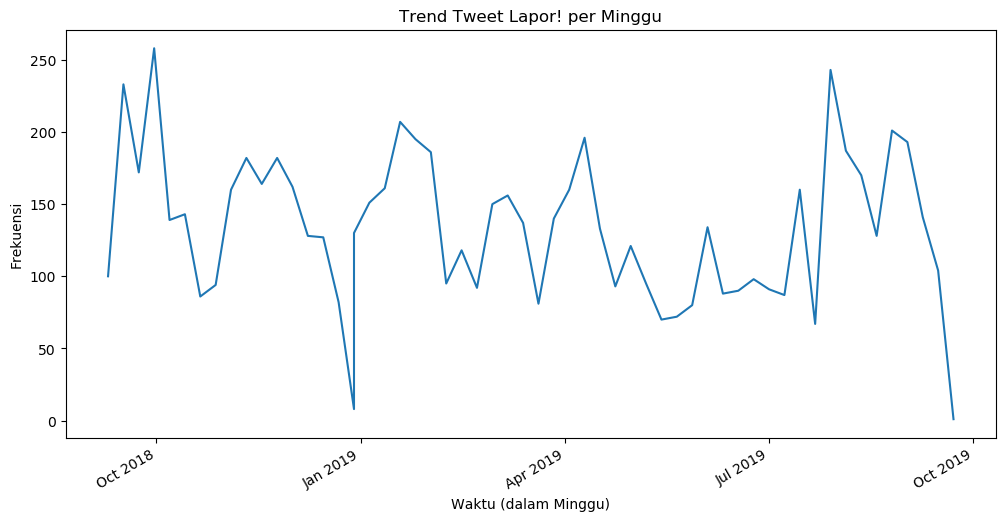

In [8]:
date_time = []

## Mengambil date time per minggu dan mengkompilasinya tiap hari senin == "1" ##
for date in df_week['weekOfyear']:
    date_time.append(dt.datetime.strptime("1-" + date, "%w-%W-%Y"))

## Plot trend tweet per minggu ##
fig = plt.figure(figsize=(12, 6), dpi = 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=93))
plt.plot(date_time,df_week['frequency'])
plt.gcf().autofmt_xdate()
plt.xlabel('Waktu (dalam Minggu)')
plt.ylabel('Frekuensi')
plt.title('Trend Tweet Lapor! per Minggu')
plt.show();

**Plot Trend Tweet per Hari**

In [9]:
## Mengambil data day ##
dayDate = raw_data['date']

## Mengambil data dan frekuensinya ##
freq_dayDate = FreqDist(dayDate)
data_dayDate = list(freq_dayDate.items())
date = []
value = []
for item in data_dayDate:
    date.append(item[0])
    value.append(item[1])

## Mengubah data menjadi dataframe ##
df_day = pd.DataFrame({"date": date, "frequency": value})
df_day['date'] = pd.to_datetime(df_day['date'], format='%Y-%m')
df_day

date  frequency
0   2019-09-30          1
1   2019-09-29         10
2   2019-09-28          5
3   2019-09-27         21
4   2019-09-26         30
..         ...        ...
378 2018-09-17         33
379 2018-09-16         23
380 2018-09-15         11
381 2018-09-14         39
382 2018-09-13         27

[383 rows x 2 columns]

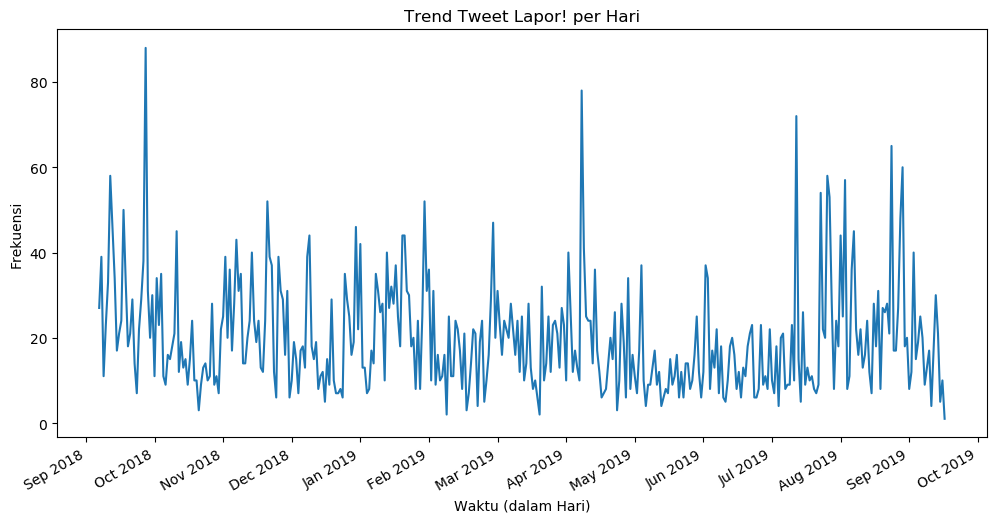

In [10]:
## Plot trend tweet per hari ##
fig = plt.figure(figsize=(12, 6), dpi = 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=31))
plt.plot(df_day['date'],df_day['frequency'])
plt.gcf().autofmt_xdate()
plt.xlabel('Waktu (dalam Hari)')
plt.ylabel('Frekuensi')
plt.title('Trend Tweet Lapor! per Hari')
plt.show()

# Soal 2 - Visualisasi kolom 'tweet' dengan wordcloud dan visualisasi top 10 dengan barchart

In [11]:
## Mengambil data tweet ##
tweetData = raw_data['tweet']

## Membuat Stopword Remover ##
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

## Membuat list tweet yang sudah di tokenisasi dan dibersihkan ##
listTweetTokenization = []

## Membuat list tweet yang tidak di tokenisasi namun dibersihkan ##
listTweetText = []

## Membuat variabel sebagai penyimpan semua data teks yang sudah di bersihkan ##
tweetText = ''
## Pembersihan data ##
for i in range(len(tweetData)):
    tweetData[i] = tweetData[i].lower()
    tokenization_tweet = wordpunct_tokenize(text = tweetData[i])
    result_tokenization = [result for result in tokenization_tweet if result not in list(string.punctuation)]
    result_tokenization = [result for result in result_tokenization if not result in stopwords]
    for item in result_tokenization:
        listTweetTokenization.append(item)
    tweetText = tweetText + ' '.join(result_tokenization)
    text = ' '.join(result_tokenization)
    listTweetText.append(text)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


**Visualisasi wordcloud**

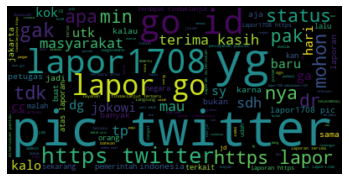

In [12]:
wordcloud = WordCloud().generate(tweetText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

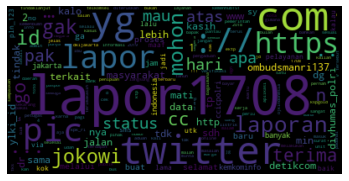

In [13]:
resultTweet = FreqDist(listTweetTokenization)
wordcloud = WordCloud().generate_from_frequencies(dict(resultTweet.items()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

**Visualisasi top 10 dengan barnchart**

In [14]:
df_resultTweet = pd.DataFrame(list(resultTweet.items()), columns=['Word', 'Frequency'])
df_resultTweet

Word  Frequency
0              pln_123        222
1               jokowi        732
2            lapor1708       3933
3      kementerianesdm         28
4                  pln         91
...                ...        ...
20686           miliar          1
20687      propesional          1
20688   jnebekasitimur          1
20689          jne_bks          1
20690       jfv0yuora2          1

[20691 rows x 2 columns]

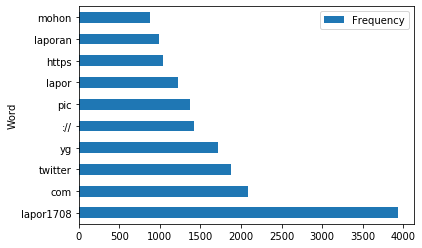

In [15]:
df_resultTweet.sort_values(by='Frequency', ascending=False).nlargest(n = 10, columns='Frequency').plot.barh('Word', 'Frequency');

# Soal 3 - Ekstrasi tweet dan visualisasi wordcloud

In [16]:
# 3. Lakukan ekstraksi tweet berdasarkan kata kunci 
# berikut lalu visualkan setiap kata yang terkait 
# dengan kata jalan dengan menggunakan wordcloud.
#     - jalan
#     - ktp
#     - air
#     - bersih
#     - sampah
#     - lubang
#     - saluran
#     - macet
#     - selokan
#     - kotor
#     - mampet
#     - banjir

In [17]:
## Melakukan preproceessing ##
hasil_preprocess = []

for i, sent in enumerate(listTweetText):
    hasil_preprocess.append(gensim.utils.simple_preprocess(sent))

In [18]:
## Membuat model ##
model = Word2Vec(hasil_preprocess, min_count=1)
print(model)

Word2Vec(vocab=18721, size=100, alpha=0.025)


In [19]:
## Isi vocab dari model ##
vocab = list(model.wv.vocab)

In [20]:
## Fungsi membuat dictionary untuk visualisasi ##
def create_dictionaryForVisualization(names,len_vocab):
    result = model.most_similar(positive = [names], topn = len_vocab)
    Dict = {names:1}
    for i in range (1,len(result)):
        Dict[result[i][0]] = result[i][1]
    return Dict

In [21]:
## Data mask untuk visualisasi ##
from PIL import Image
circle_mask = np.array(Image.open("./data/circle.png"))

**Terkait dengan jalan**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


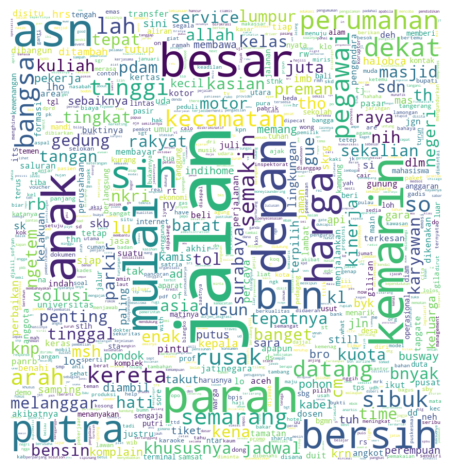

In [22]:
## Mencari similarity terkait dengan jalan ##
Dict = create_dictionaryForVisualization('jalan',len(vocab))
## Visualisasi keterkaitan dengan jalan ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan ktp**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


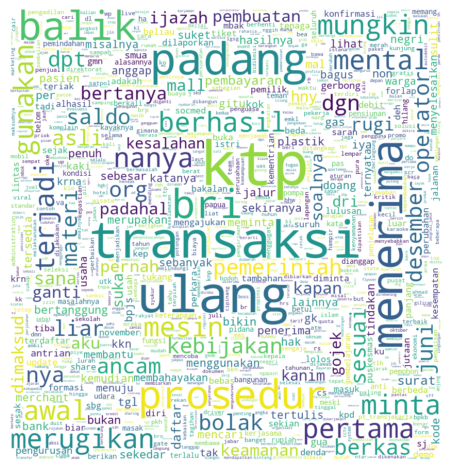

In [23]:
## Mencari similarity terkait dengan ktp ##
Dict = create_dictionaryForVisualization('ktp',len(vocab))
## Visualisasi keterkaitan dengan ktp ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan air**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


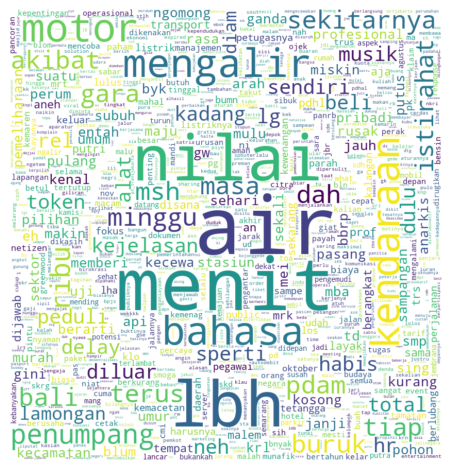

In [24]:
## Mencari similarity terkait dengan air ##
Dict = create_dictionaryForVisualization('air',len(vocab))
## Visualisasi keterkaitan dengan air ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan bersih**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


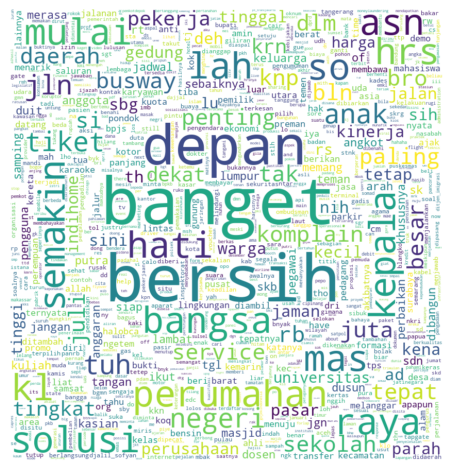

In [25]:
## Mencari similarity terkait dengan bersih ##
Dict = create_dictionaryForVisualization('bersih',len(vocab))
## Visualisasi keterkaitan dengan bersih ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan sampah**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


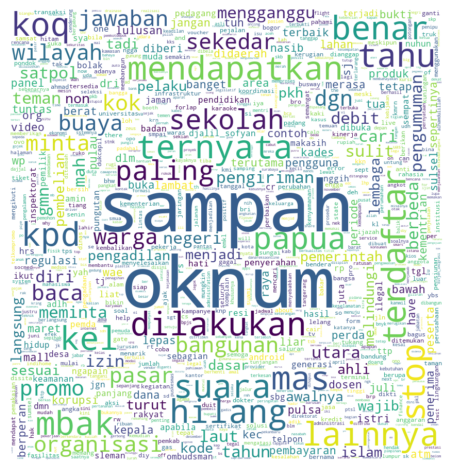

In [26]:
## Mencari similarity terkait dengan sampah ##
Dict = create_dictionaryForVisualization('sampah',len(vocab))
## Visualisasi keterkaitan dengan sampah ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan lubang**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


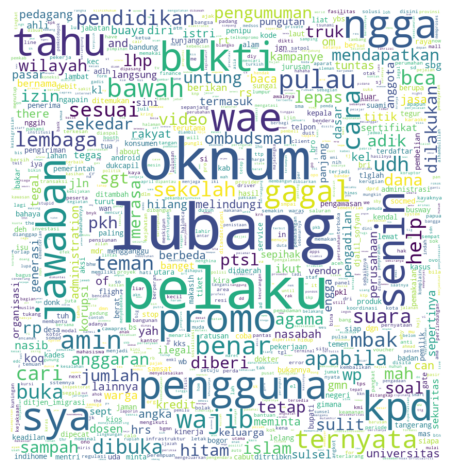

In [27]:
## Mencari similarity terkait dengan lubang ##
Dict = create_dictionaryForVisualization('lubang',len(vocab))
## Visualisasi keterkaitan dengan lubang ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan saluran**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


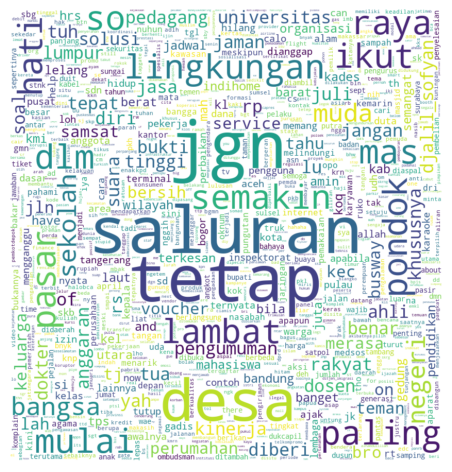

In [28]:
## Mencari similarity terkait dengan saluran ##
Dict = create_dictionaryForVisualization('saluran',len(vocab))
## Visualisasi keterkaitan dengan saluran ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan macet**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


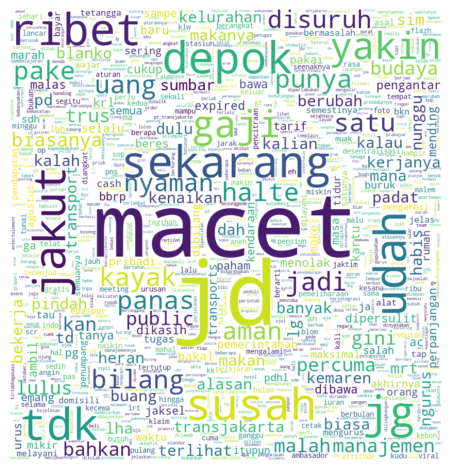

In [29]:
## Mencari similarity terkait dengan macet ##
Dict = create_dictionaryForVisualization('macet',len(vocab))
## Visualisasi keterkaitan dengan macet ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan selokan**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


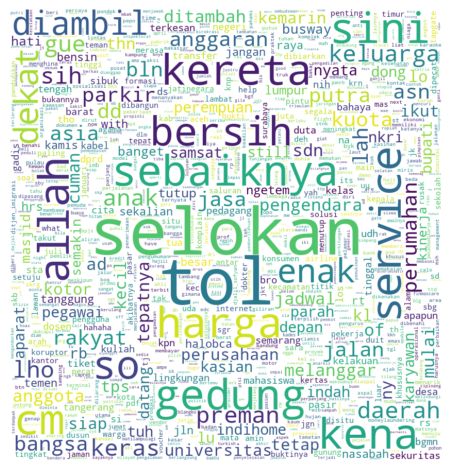

In [30]:
## Mencari similarity terkait dengan selokan ##
Dict = create_dictionaryForVisualization('selokan',len(vocab))
## Visualisasi keterkaitan dengan selokan ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan kotor**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


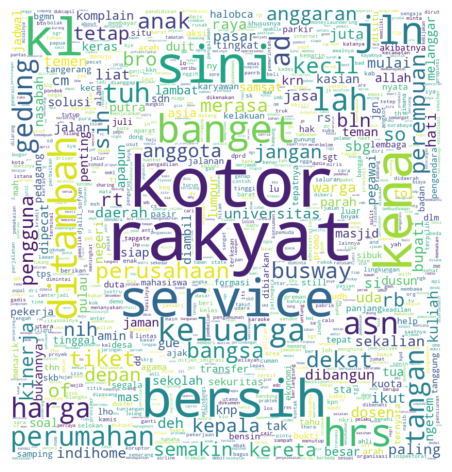

In [31]:
## Mencari similarity terkait dengan kotor ##
Dict = create_dictionaryForVisualization('kotor',len(vocab))
## Visualisasi keterkaitan dengan kotor ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan mampet**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


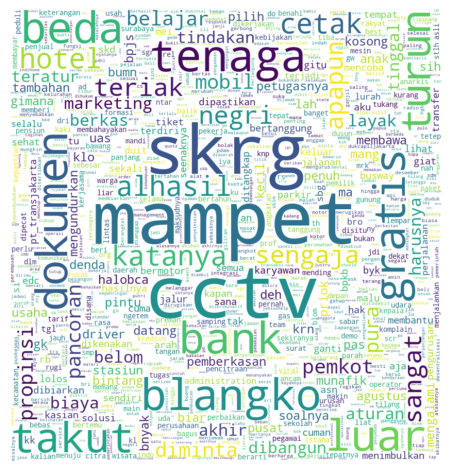

In [32]:
## Mencari similarity terkait dengan mampet ##
Dict = create_dictionaryForVisualization('mampet',len(vocab))
## Visualisasi keterkaitan dengan mampet##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Terkait dengan banjir**

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


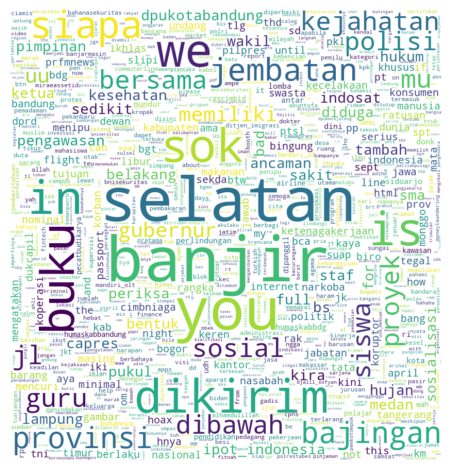

In [33]:
## Mencari similarity terkait dengan banjir ##
Dict = create_dictionaryForVisualization('banjir',len(vocab))
## Visualisasi keterkaitan dengan banjir ##
wordcloud = WordCloud(background_color="white",mask=circle_mask, max_words=1000).generate_from_frequencies(Dict)
plt.figure(figsize=(12,6), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Soal 4 - Cek sentimen dari setiap tweet berdasarkan waktu

In [34]:
## Load Data Sentimen ##
sentimen = pd.read_csv('./data/sentimen.csv')
sentimen.head()

kata sentimen
0              a+  positif
1  acungan jempol  positif
2         adaptif  positif
3            adil  positif
4        afinitas  positif

In [35]:
## Dataframe Text ##
df_text = pd.DataFrame({"content": listTweetText})
df_text['content'] = df_text['content'].apply(lambda x: gensim.utils.simple_preprocess(x)).copy()
df_text['time'] = raw_data['time']
df_text

content      time
0     [pln_, jokowi, lapor, kementerianesdm, pln, sd...  00:02:08
1     [cicilan, sisa, pihak, bfi, memakai, debt, col...  21:56:01
2     [laporgub_, lapor, humas_resklaten, pemkab_kla...  12:57:53
3                    [http, paspor, intersys, pro, top]  12:57:36
4     [bukannya, antrian, online, sy, baru, ganti, p...  12:54:35
...                                                 ...       ...
7617  [lapor, lapor, ccicpolri, bareskrimpolri, polh...  10:20:40
7618  [dinas, kominfo, kabupaten, gorontalo, sosiali...  09:06:50
7619  [masuk, masa, kampanye, kalau, masa, kampanye,...  08:50:45
7620  [https, www, google, co, id, amp, jateng, trib...  08:40:18
7621  [dri, tgl, smpai, tgl, mengunakan, paket, yes,...  08:10:38

[7622 rows x 2 columns]

In [36]:
## Dataframe analysis sentimen ##
analysis = df_text.iloc[:,[0,1]]
analysis

content      time
0     [pln_, jokowi, lapor, kementerianesdm, pln, sd...  00:02:08
1     [cicilan, sisa, pihak, bfi, memakai, debt, col...  21:56:01
2     [laporgub_, lapor, humas_resklaten, pemkab_kla...  12:57:53
3                    [http, paspor, intersys, pro, top]  12:57:36
4     [bukannya, antrian, online, sy, baru, ganti, p...  12:54:35
...                                                 ...       ...
7617  [lapor, lapor, ccicpolri, bareskrimpolri, polh...  10:20:40
7618  [dinas, kominfo, kabupaten, gorontalo, sosiali...  09:06:50
7619  [masuk, masa, kampanye, kalau, masa, kampanye,...  08:50:45
7620  [https, www, google, co, id, amp, jateng, trib...  08:40:18
7621  [dri, tgl, smpai, tgl, mengunakan, paket, yes,...  08:10:38

[7622 rows x 2 columns]

In [37]:
## Melakukan explode kata ##
analysis = analysis.explode('content')
analysis

content      time
0                pln_  00:02:08
0              jokowi  00:02:08
0               lapor  00:02:08
0     kementerianesdm  00:02:08
0                 pln  00:02:08
...               ...       ...
7621              pic  08:10:38
7621          twitter  08:10:38
7621              com  08:10:38
7621              jfv  08:10:38
7621            yuora  08:10:38

[140709 rows x 2 columns]

In [38]:
## Melakukan analysis sentimen ##
result_join = pd.merge(left=analysis, right=sentimen, left_on='content', right_on='kata')
result_join

content      time        kata sentimen
0            baik  00:02:08        baik  positif
1            baik  09:24:22        baik  positif
2            baik  00:59:14        baik  positif
3            baik  06:45:17        baik  positif
4            baik  04:41:25        baik  positif
...           ...       ...         ...      ...
13831  gerombolan  20:44:00  gerombolan  negatif
13832    terbalik  20:21:43    terbalik  negatif
13833  konspirasi  18:33:05  konspirasi  negatif
13834   kebajikan  16:08:06   kebajikan  positif
13835      nikmat  15:59:25      nikmat  positif

[13836 rows x 4 columns]

In [39]:
## Mengambil nilai sentimen dari negatif atau positif ##
result_join = result_join.iloc[:,[0,3]].assign(value_sentimen=0).groupby(['content','sentimen'], as_index=False).count()
result_join

content sentimen  value_sentimen
0         adil  negatif              12
1         adil  positif              12
2     afirmasi  positif               9
3        agung  positif               8
4         ahli  positif              14
...        ...      ...             ...
1124       wah  positif              24
1125     wahyu  positif               1
1126   waspada  negatif               7
1127   waspada  positif               7
1128     yakin  positif              40

[1129 rows x 3 columns]

In [40]:
result_join = result_join.pivot_table(index='content', columns='sentimen', values='value_sentimen', fill_value=0).to_records()
## Mengubah dari groupby dataframe ke dataframe aja ##
result_join

rec.array([('adil', 12, 12), ('afirmasi',  0,  9), ('agung',  0,  8), ...,
           ('wahyu',  0,  1), ('waspada',  7,  7), ('yakin',  0, 40)],
          dtype=[('content', 'O'), ('negatif', '<i8'), ('positif', '<i8')])

In [41]:
## Mendapat nilai sentimen positif dan negatif ##
result_join = pd.DataFrame(result_join).assign(sentimen=0)
result_join

content  negatif  positif  sentimen
0         adil       12       12         0
1     afirmasi        0        9         0
2        agung        0        8         0
3         ahli        0       14         0
4      ahlinya        0        1         0
...        ...      ...      ...       ...
1057     virus        1        0         0
1058       wah        0       24         0
1059     wahyu        0        1         0
1060   waspada        7        7         0
1061     yakin        0       40         0

[1062 rows x 4 columns]

In [42]:
## Mendapat nilai sentimen ##
result_join['sentimen'] = result_join['positif'] - result_join['negatif']
result_join

content  negatif  positif  sentimen
0         adil       12       12         0
1     afirmasi        0        9         9
2        agung        0        8         8
3         ahli        0       14        14
4      ahlinya        0        1         1
...        ...      ...      ...       ...
1057     virus        1        0        -1
1058       wah        0       24        24
1059     wahyu        0        1         1
1060   waspada        7        7         0
1061     yakin        0       40        40

[1062 rows x 4 columns]

In [43]:
## Fungsi warna untuk plot ##
def warna(sentimen):
    war = []
    for sent in sentimen:
        if sent >=0:
            war.append("positif")
        else:
            war.append("negatif")
    return war

In [44]:
result_join = result_join[['content','sentimen']].assign(warna=warna(result_join['sentimen'].tolist()))
result_join

content  sentimen    warna
0         adil         0  positif
1     afirmasi         9  positif
2        agung         8  positif
3         ahli        14  positif
4      ahlinya         1  positif
...        ...       ...      ...
1057     virus        -1  negatif
1058       wah        24  positif
1059     wahyu         1  positif
1060   waspada         0  positif
1061     yakin        40  positif

[1062 rows x 3 columns]

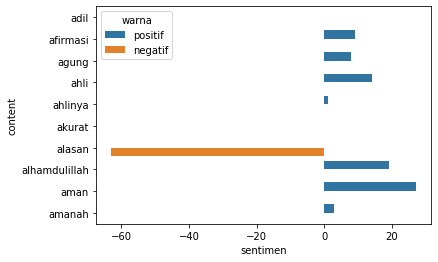

In [45]:
import seaborn as sns
## Melihat sentimen 10 berita pertama ##
sns.barplot(x='sentimen', y='content', hue='warna', data=result_join.iloc[0:10,]);

# Soal 5 - Tugas Tambahan

**Rerata Aktivitas Berdasarkan Hari**

In [46]:
## Mengambil data date ##
date_rawData = raw_data['date']
freqDate = FreqDist(date_rawData)
dateData = list(freqDate.items())

date = []
value = []
for item in dateData:
    date.append(item[0])
    value.append(item[1])
    
df_day = pd.DataFrame({"date": date, "value": value})
df_day

date  value
0    2019-09-30      1
1    2019-09-29     10
2    2019-09-28      5
3    2019-09-27     21
4    2019-09-26     30
..          ...    ...
378  2018-09-17     33
379  2018-09-16     23
380  2018-09-15     11
381  2018-09-14     39
382  2018-09-13     27

[383 rows x 2 columns]

In [47]:
## Mengambil jumlah hari senin, selasa, dst ##
from collections import defaultdict

day_of_week_dict = defaultdict(lambda: 0)

for date in df_day['date']:
    datetime = dt.datetime.strptime(date, "%Y-%m-%d")
    day = dt.datetime.strftime(datetime, "%w")
    day_of_week_dict[day] += 1
    
for key in day_of_week_dict:
    print(key, day_of_week_dict[key])
day_of_week_dict

1 55
0 55
6 55
5 55
4 55
3 54
2 54


defaultdict(<function __main__.<lambda>()>,
            {'1': 55, '0': 55, '6': 55, '5': 55, '4': 55, '3': 54, '2': 54})

In [48]:
## Mengambil data day dan menghitung rerata aktivitas per hari ##
dayDate = pd.to_datetime(raw_data['date'], format='%Y-%m-%d').dt.strftime('%w')
freqTweet = FreqDist(dayDate)
dateData = list(freqTweet.items())
date = []
value = []
    
for i in range(len(dateData)):
    date.append(dateData[i][0])
    value.append(dateData[i][1] / day_of_week_dict[str(i)])

df_day = pd.DataFrame({"day": date, "freq": value})
df_day

day       freq
0   1  20.963636
1   0  13.436364
2   6  16.851852
3   5  23.055556
4   4  24.600000
5   3  21.145455
6   2  19.254545

In [49]:
## Sorting data ##
df_day = df_day.sort_values(by=['day'], inplace = False)
df_day = df_day.reset_index(drop=True)
df_day

day       freq
0   0  13.436364
1   1  20.963636
2   2  19.254545
3   3  21.145455
4   4  24.600000
5   5  23.055556
6   6  16.851852

In [50]:
## Mengubah menjadi nama hari ##
nameDay = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
df_day['day'] = nameDay

In [51]:
df_day

day       freq
0  Sun  13.436364
1  Mon  20.963636
2  Tue  19.254545
3  Wed  21.145455
4  Thu  24.600000
5  Fri  23.055556
6  Sat  16.851852

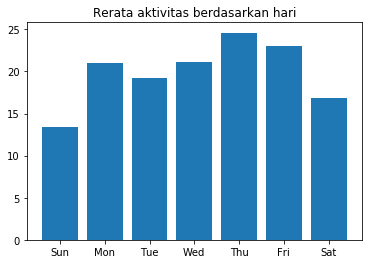

In [52]:
## Plot rerata aktivitas berdasarkan hari ##
plt.title('Rerata aktivitas berdasarkan hari')
plt.bar(df_day['day'],df_day['freq']);

**Rerata Aktivitas per 6 jam**

In [53]:
## Mengambil data time jam ##
timeDate = pd.to_datetime(raw_data['time'], format='%H:%M:%S').dt.strftime('%H')
freqDate = FreqDist(timeDate)
dateData = list(freqDate.items())

date = []
value = []
sums = 0

for item in dateData:
    sums = sums + item[1]

for item in dateData:
    date.append(item[0])
    ## append hasil rata-ratanya ##
    value.append(item[1]/sums)
    
df_time = pd.DataFrame({"date": date, "value": value})

In [54]:
## Sorting ##
df_time = df_time.sort_values(by=['date'], inplace = False)
df_time = df_time.reset_index(drop=True)
df_time

date     value
0    00  0.020467
1    01  0.013120
2    02  0.007872
3    03  0.006691
4    04  0.005510
5    05  0.012595
6    06  0.022304
7    07  0.048412
8    08  0.071110
9    09  0.073472
10   10  0.079507
11   11  0.069404
12   12  0.051430
13   13  0.060220
14   14  0.064812
15   15  0.064288
16   16  0.043689
17   17  0.040803
18   18  0.042771
19   19  0.048281
20   20  0.045920
21   21  0.045133
22   22  0.033325
23   23  0.028864

In [55]:
## Mengambil rerata tiap 6 jam ##
hours = []
freqs = []
count=0
temp = 0
for i in range(len(df_time['date'])):
    if (count == 0):
        hours.append(df_time['date'][i])
        count = count + 1
    else:
        count = count +1
        temp = temp + df_time['value'][i]
        if (count == 7):
            count = 0
            freqs.append(temp)
            temp = 0
            
freqs.append(temp)

In [56]:
## Mengubah nama data utk sumbu x ##
data = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
hours = data
new_dfTime = pd.DataFrame({'data':hours, 'freq':freqs})

In [57]:
new_dfTime

data      freq
0  00:00-05:59  0.068092
1  06:00-11:59  0.405143
2  12:00-17:59  0.285752
3  18:00-23:59  0.062188

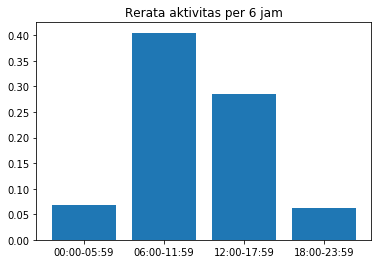

In [58]:
## Plot rerata aktivitas per 6 jam ##
plt.title('Rerata aktivitas per 6 jam')
plt.bar(new_dfTime['data'],new_dfTime['freq']);